<center>
<a href="https://github.com/hafs96/" ><img src="./git.jpeg" style="float:right; max-width: 50px; display: inline " /></a>
</center>
<div id="report" style="text-align: center; padding: 10px; background-color:rgb(17, 16, 16); border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); ">
  <h1 style="font-size: 2.2em; font-family: 'Georgia', serif; color:rgb(247, 239, 248); margin-bottom: 10px;">
    AirBnb
  </h1>
  <p style="font-size: 1.1em; font-family: 'Arial', sans-serif; color:rgb(227, 231, 235); margin: 5px 0;">
    Prepared by :  ZIAN Hafsa
  </p>
</div> 

In [6]:
# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import scipy.sparse
import os
import joblib
import matplotlib.pyplot as plt

In [7]:
# Chargement des données...
data = pd.read_csv("C:/Users/l/Desktop/ML & IA/S6/deep learning -Monir/ZIAN HAFSA- Project/Data/Airbnb_Data.csv")

# Affichage d'un aperçu des données
print("\nAperçu des données :")
data.head()



Aperçu des données :


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [8]:
# Statistiques descriptives des variables numériques
print("\nStatistiques descriptives des variables numériques :")
data.describe()


Statistiques descriptives des variables numériques :


,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [9]:
# Informations sur les types de données et les valeurs manquantes
print("\nInformations sur les types de données et les valeurs manquantes :")
data.info()


Informations sur les types de données et les valeurs manquantes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    

In [10]:
print("\nNombre de valeurs manquantes par colonne :")
data.isnull().sum()


Nombre de valeurs manquantes par colonne :


id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [11]:
# Visualisation de la distribution des variables numériques
import matplotlib.pyplot as plt
import seaborn as sns


Visualisation de la distribution des variables numériques...


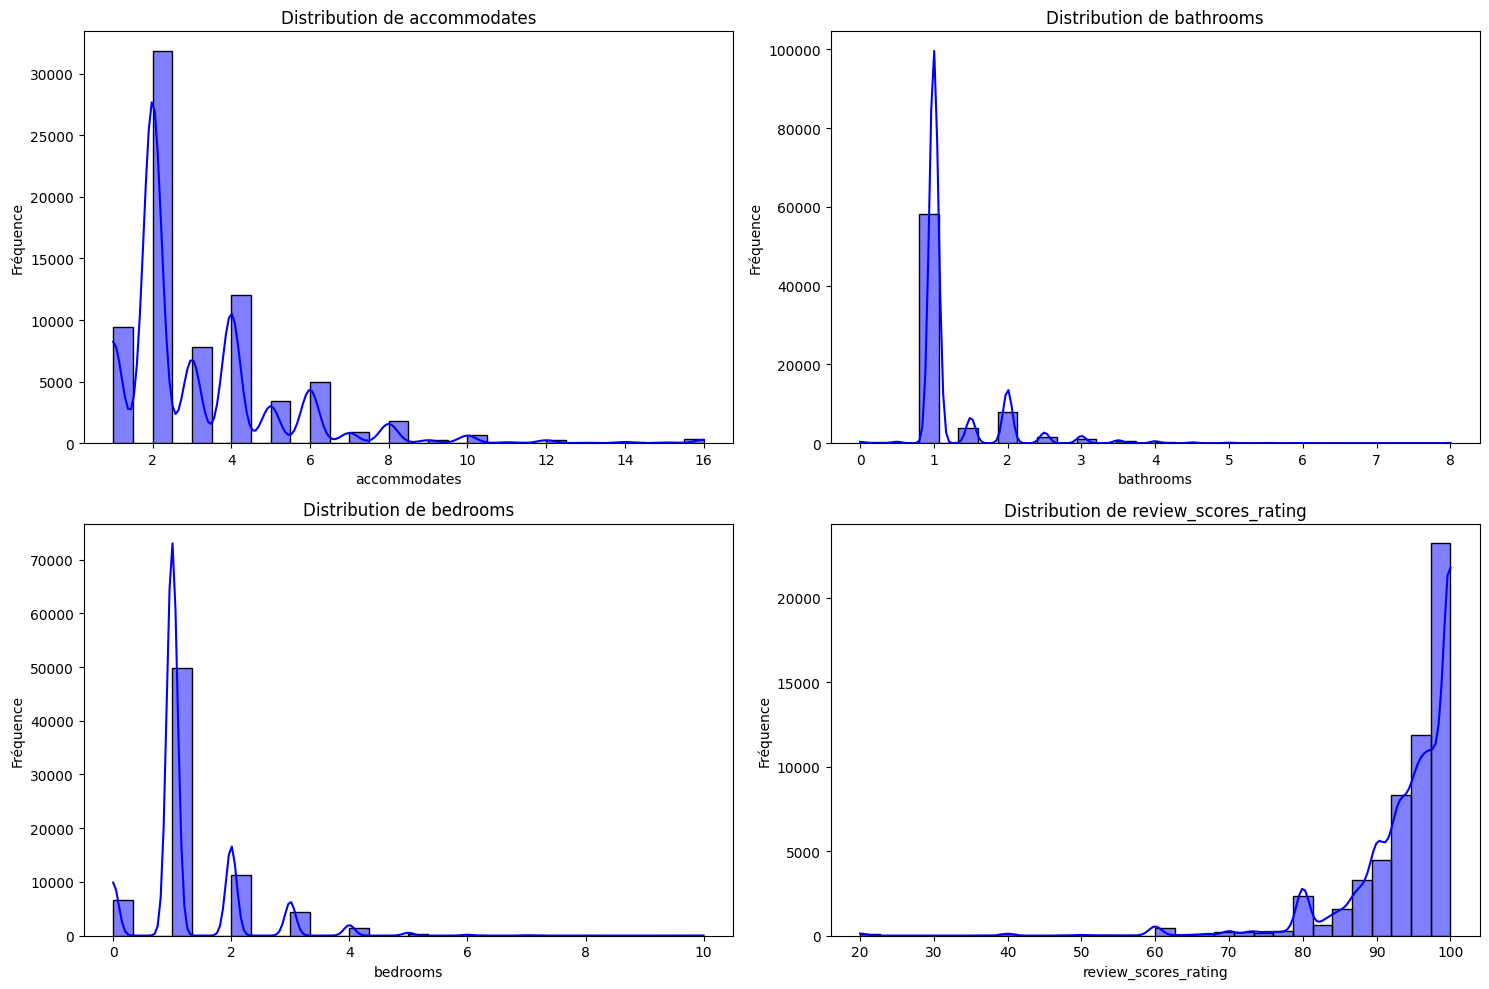

In [12]:
print("\nVisualisation de la distribution des variables numériques...")
numerical_columns = ["accommodates", "bathrooms", "bedrooms", "review_scores_rating"]
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
plt.tight_layout()
plt.show()

In [13]:
# Remplissage des valeurs manquantes
print("\nRemplissage des valeurs manquantes...")
data['bathrooms'] = data['bathrooms'].fillna(data['bathrooms'].median())
data['bedrooms'] = data['bedrooms'].fillna(data['bedrooms'].median())
data['beds'] = data['beds'].fillna(data['beds'].median())

# Variables catégoriques : Remplissage par le mode ou une valeur spécifique
categorical_columns = ["property_type", "room_type", "cancellation_policy", "bed_type", "city", "neighbourhood"]
for col in categorical_columns:
    if data[col].isnull().sum() > 0:  # Vérifier s'il y a des valeurs manquantes
        data[col] = data[col].fillna(data[col].mode()[0])  # Mode (valeur la plus fréquente)
        print(f"{col} : Valeurs manquantes remplies par le mode.")

# Colonnes spécifiques : Dates ou chaînes de caractères
date_columns = ["first_review", "last_review", "host_since"]
for col in date_columns:
    if data[col].isnull().sum() > 0:  # Vérifier s'il y a des valeurs manquantes
        data[col] = data[col].fillna("No data")  # Remplir par une valeur par défaut
        print(f"{col} : Valeurs manquantes remplies par 'No data'.")

# Colonnes booléennes : Remplissage par False (ou True selon le contexte)
boolean_columns = ["cleaning_fee", "instant_bookable", "host_has_profile_pic", "host_identity_verified"]
for col in boolean_columns:
    if data[col].isnull().sum() > 0:  # Vérifier s'il y a des valeurs manquantes
        data[col] = data[col].fillna(False)  # Remplir par False
        print(f"{col} : Valeurs manquantes remplies par False.")

# Colonnes textuelles : Remplissage par une chaîne vide
text_columns = ["description", "name", "amenities"]
for col in text_columns:
    if data[col].isnull().sum() > 0:  # Vérifier s'il y a des valeurs manquantes
        data[col] = data[col].fillna("")  # Remplir par une chaîne vide
        print(f"{col} : Valeurs manquantes remplies par une chaîne vide.")


Remplissage des valeurs manquantes...
neighbourhood : Valeurs manquantes remplies par le mode.
first_review : Valeurs manquantes remplies par 'No data'.
last_review : Valeurs manquantes remplies par 'No data'.
host_since : Valeurs manquantes remplies par 'No data'.
host_has_profile_pic : Valeurs manquantes remplies par False.
host_identity_verified : Valeurs manquantes remplies par False.


In [14]:
# Vérification après le remplissage des valeurs manquantes
print("\nVérification après le remplissage des valeurs manquantes :")
data.isnull().sum()


Vérification après le remplissage des valeurs manquantes :


id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review                  0
host_has_profile_pic          0
host_identity_verified        0
host_response_rate        18299
host_since                    0
instant_bookable              0
last_review                   0
latitude                      0
longitude                     0
name                          0
neighbourhood                 0
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                      0
beds                          0
dtype: int64

In [16]:
# host_response_rate : Remplissage par la médiane ou "No data"
if data["host_response_rate"].isnull().sum() > 0:
    # Convertir les pourcentages en nombres flottants (si nécessaire)
    data["host_response_rate"] = data["host_response_rate"].str.rstrip("%").astype(float)
    median_host_response_rate = data["host_response_rate"].median()
    data["host_response_rate"] = data["host_response_rate"].fillna(median_host_response_rate)
    print(f"host_response_rate : Valeurs manquantes remplies par la médiane ({median_host_response_rate}).")

# review_scores_rating : Remplissage par la médiane
if data["review_scores_rating"].isnull().sum() > 0:
    median_review_scores_rating = data["review_scores_rating"].median()
    data["review_scores_rating"] = data["review_scores_rating"].fillna(median_review_scores_rating)
    print(f"review_scores_rating : Valeurs manquantes remplies par la médiane ({median_review_scores_rating}).")

# thumbnail_url : Remplissage par une chaîne vide
if data["thumbnail_url"].isnull().sum() > 0:
    data["thumbnail_url"] = data["thumbnail_url"].fillna("")
    print("thumbnail_url : Valeurs manquantes remplies par une chaîne vide.")

# zipcode : Remplissage par "Unknown"
if data["zipcode"].isnull().sum() > 0:
    data["zipcode"] = data["zipcode"].fillna("Unknown")
    print("zipcode : Valeurs manquantes remplies par 'Unknown'.")

# Vérification finale
print("\nVérification après le traitement des valeurs manquantes spécifiques :")
data.isnull().sum()


Vérification après le traitement des valeurs manquantes spécifiques :


id                        0
log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
first_review              0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
last_review               0
latitude                  0
longitude                 0
name                      0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
thumbnail_url             0
zipcode                   0
bedrooms                  0
beds                      0
dtype: int64

In [17]:
# Normalisation des données structurées
print("\nNormalisation des données structurées...")
scaler = StandardScaler()
X_structured = scaler.fit_transform(data[["accommodates", "bathrooms", "bedrooms", "review_scores_rating"]])


Normalisation des données structurées...


In [18]:
# Affichage des données normalisées
print("\nAperçu des données normalisées :")
print(X_structured[:5])  # Afficher les 5 premières lignes des données normalisées


Aperçu des données normalisées :
[[-0.072041   -0.40356879 -0.31170305  0.79165735]
 [ 1.78533617 -0.40356879  2.03663738 -0.21653604]
 [ 0.85664759 -0.40356879 -0.31170305 -0.36056366]
 [ 0.39230329 -0.40356879  0.86246716  0.21554684]
 [-0.5363853  -0.40356879 -1.48587327 -7.85000025]]


In [19]:
# Prétraitement des descriptions textuelles
print("\nPrétraitement des descriptions textuelles...")
vectorizer = TfidfVectorizer(max_features=1000)
description_vectors = vectorizer.fit_transform(data["description"])


Prétraitement des descriptions textuelles...


In [ ]:
# Caractéristiques structurées
print("Sélection des caractéristiques...")
X_structured = data[["accommodates", "bathrooms", "bedrooms", "review_scores_rating"]]

# Combinaison des caractéristiques structurées et textuelles
X_combined = scipy.sparse.hstack([X_structured, description_vectors])

# Variable cible
y = data["log_price"]

# Diviser les données en ensembles d'entraînement et de test
print("Division des données en ensembles d'entraînement et de test...")
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Remplir les valeurs manquantes avec la médiane
print("Traitement des valeurs manquantes...")
imputer = SimpleImputer(strategy="median")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

print("Préparation des données terminée avec succès !")

In [ ]:
# Initialiser et entraîner le modèle
print("Entraînement de la régression linéaire...")
model = LinearRegression()
model.fit(X_train, y_train)

# Faire des prédictions
print("Évaluation du modèle...")
y_pred = model.predict(X_test)

# Calculer l'erreur RMSE
try:
    rmse = mean_squared_error(y_test, y_pred, squared=False)
except TypeError:
    print("Calcul de RMSE manuellement (version de Scikit-learn obsolète)...")
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
print(f"RMSE : {rmse}")

# Interpréter les coefficients
feature_names = ["accommodates", "bathrooms", "bedrooms", "review_scores_rating"]
coefficients = dict(zip(feature_names, model.coef_[:len(feature_names)]))
print("\nCoefficients des caractéristiques structurées :")
for feature, coef in coefficients.items():
    print(f"{feature}: {coef:.4f}")

# Afficher les mots les plus influents dans les descriptions
tfidf_feature_names = vectorizer.get_feature_names_out()
tfidf_coefficients = model.coef_[len(feature_names):]
top_words = sorted(zip(tfidf_feature_names, tfidf_coefficients), key=lambda x: abs(x[1]), reverse=True)[:10]
print("\nMots les plus influents dans les descriptions :")
for word, coef in top_words:
    print(f"{word}: {coef:.4f}")

# Visualiser les résultats
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Parfaite Prédiction")
plt.xlabel("True Prices (log scale)")
plt.ylabel("Predicted Prices (log scale)")
plt.title("True vs Predicted Prices")
plt.legend()
plt.show()

print("Entraînement terminé avec succès !")